In [1]:
%cd ../..

/home/napulen/AugmentedNet


In [39]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 5)

from AugmentedNet.annotation_parser import parseAnnotation
from AugmentedNet.output_representations import Bass35, Tenor35, Alto35, Soprano35

In [5]:
def _plot_array(arr):
    plt.pcolor(arr.T, edgecolors="k", linewidth=1, cmap="tab20")
    plt.show()

In [15]:
score = "claraschumann.rntxt"
df = parseAnnotation(score)
df = df.iloc[:100]

In [33]:
def one_hot(array):
    arr = array.reshape(-1)
    n_values = np.max(arr) + 1
    return np.eye(n_values)[array.reshape(-1)]

In [34]:
bass35 = Bass35(df)
tenor35 = Tenor35(df)
alto35 = Alto35(df)
soprano35 = Soprano35(df)

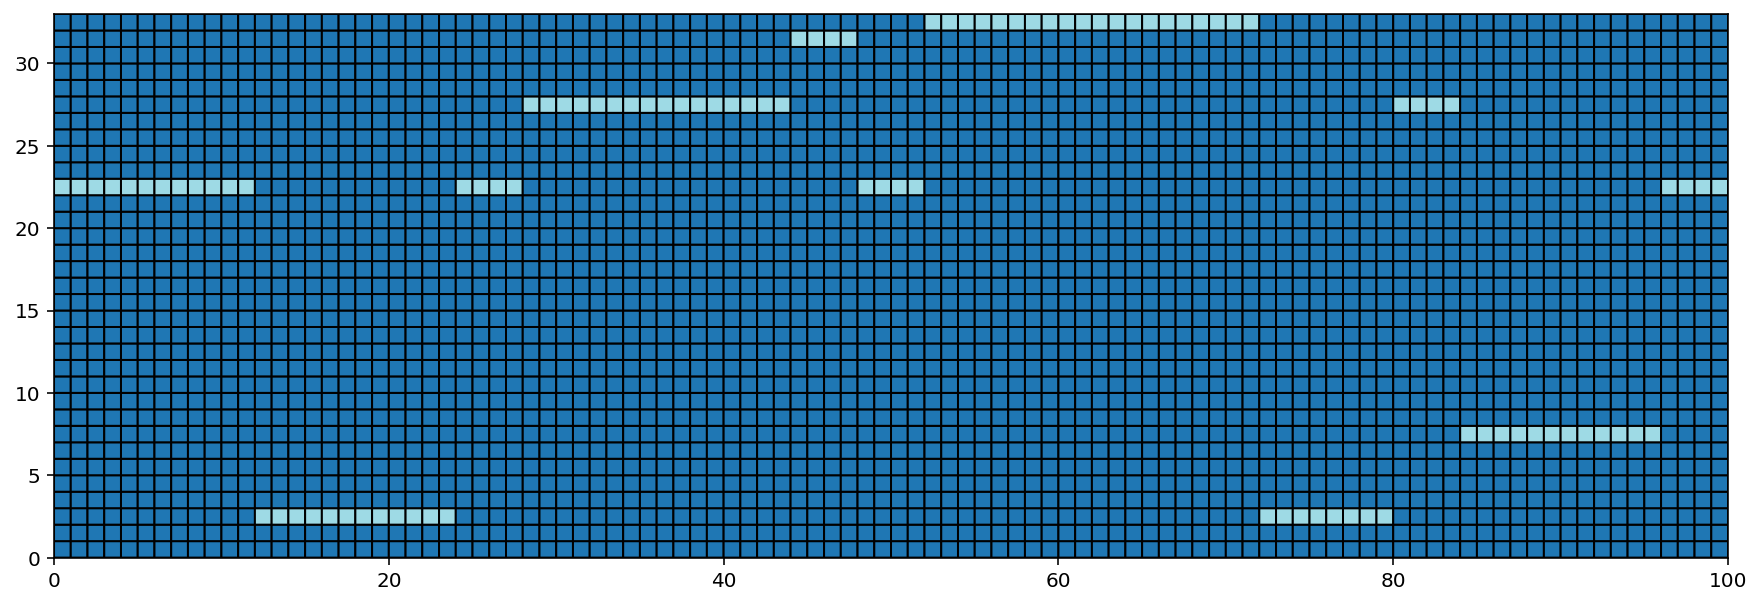

In [40]:
_plot_array(one_hot(bass35.array))

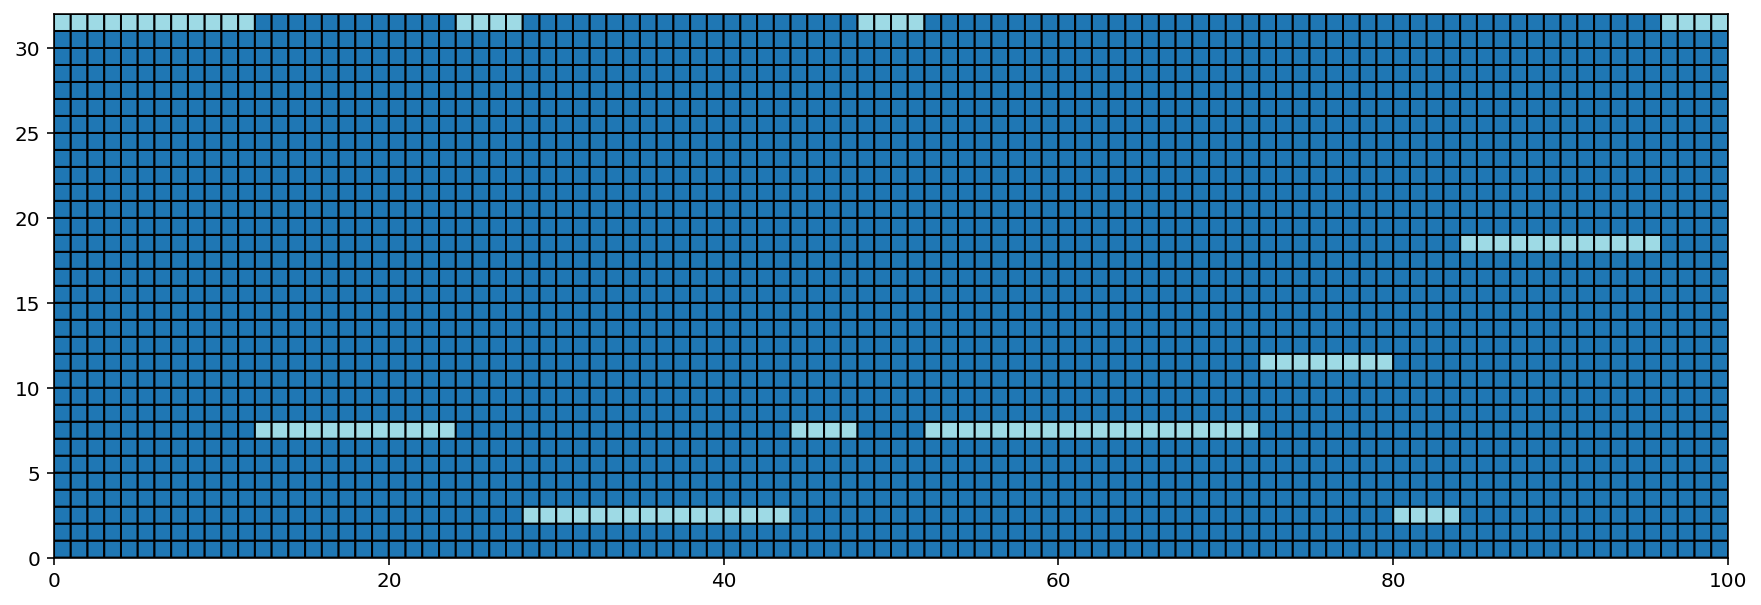

In [41]:
_plot_array(one_hot(tenor35.array))

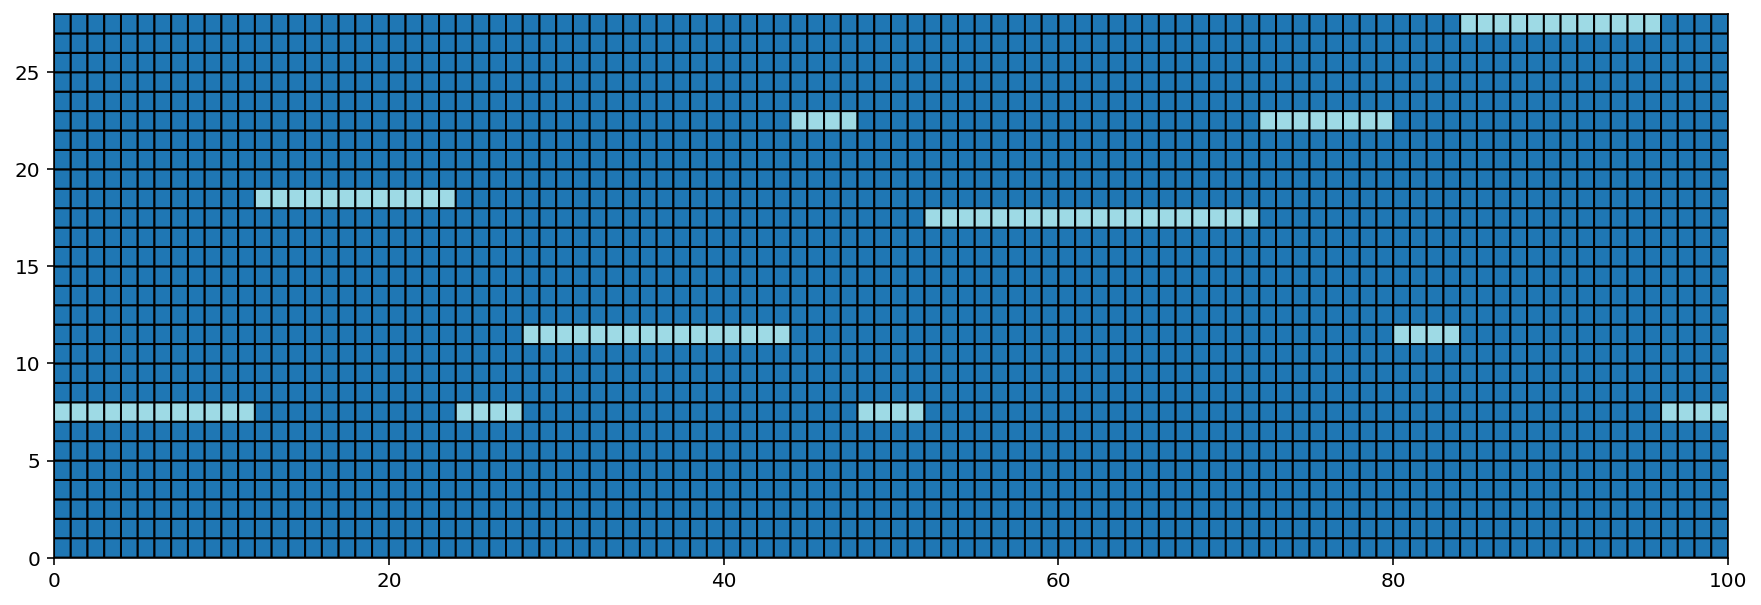

In [42]:
_plot_array(one_hot(alto35.array))

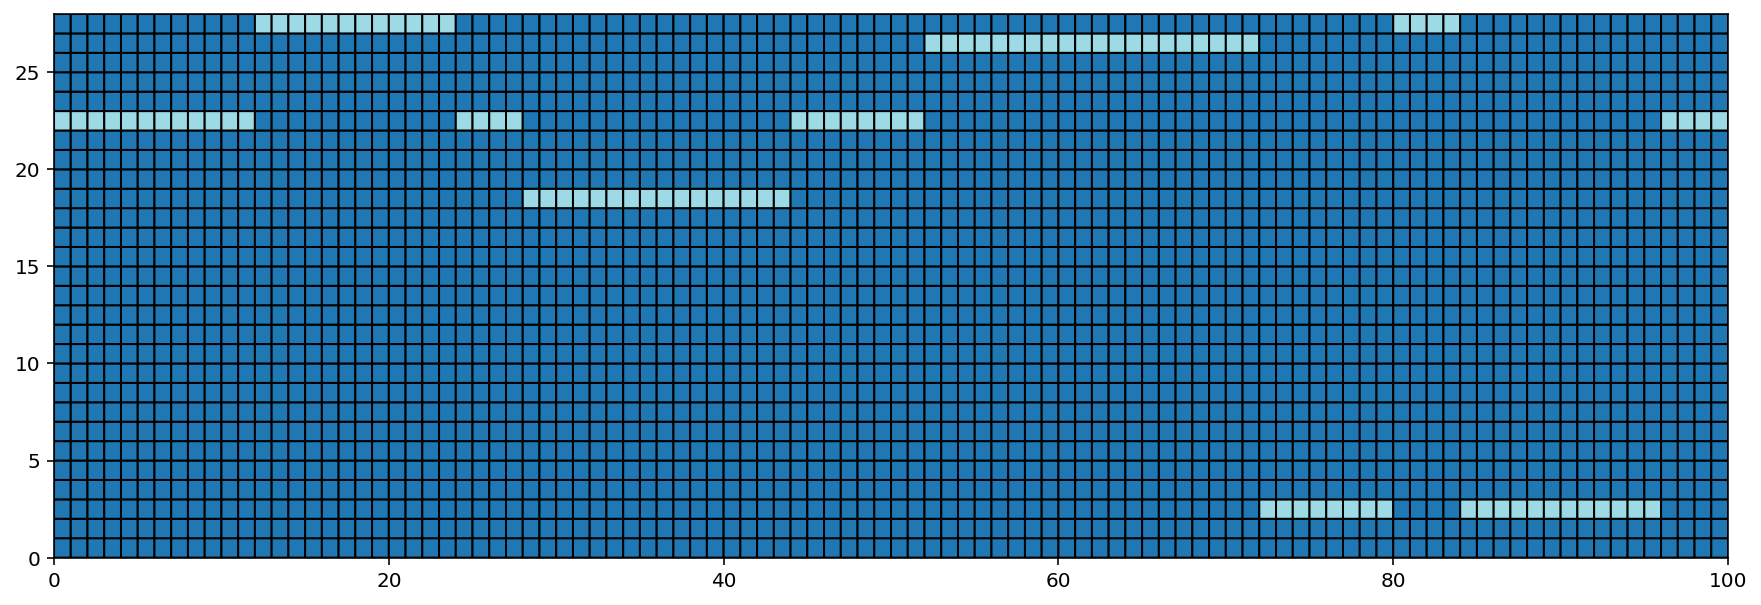

In [43]:
_plot_array(one_hot(soprano35.array))